In [1]:
#Heart Disease Prediction

In [58]:
#Imaport Libary

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [60]:
#Import Dataset

In [61]:
df=pd.read_csv('heart.csv')

In [62]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [63]:
df.size

14280

In [64]:
df.shape

(1190, 12)

In [65]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
chest pain type:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
resting bp s:			resting blood pressure
cholesterol:			 serum cholestoral in mg/dl
fasting blood sugar:			fasting blood sugar > 120 mg/dl
resting ecg:			resting electrocardiographic results (values 0,1,2)
max heart rate:			 maximum heart rate achieved
exercise angina:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
ST slope:			the slope of the peak exercise ST segment
target:			number of major vessels (0-3) colored by flourosopy


IndexError: index 12 is out of bounds for axis 0 with size 12

In [66]:
df.target 

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 1190, dtype: int64

In [67]:
df.groupby('target').size()

target
0    561
1    629
dtype: int64

In [68]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [69]:
df.info() #check the dataset have any NULL value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [70]:
#Visualization

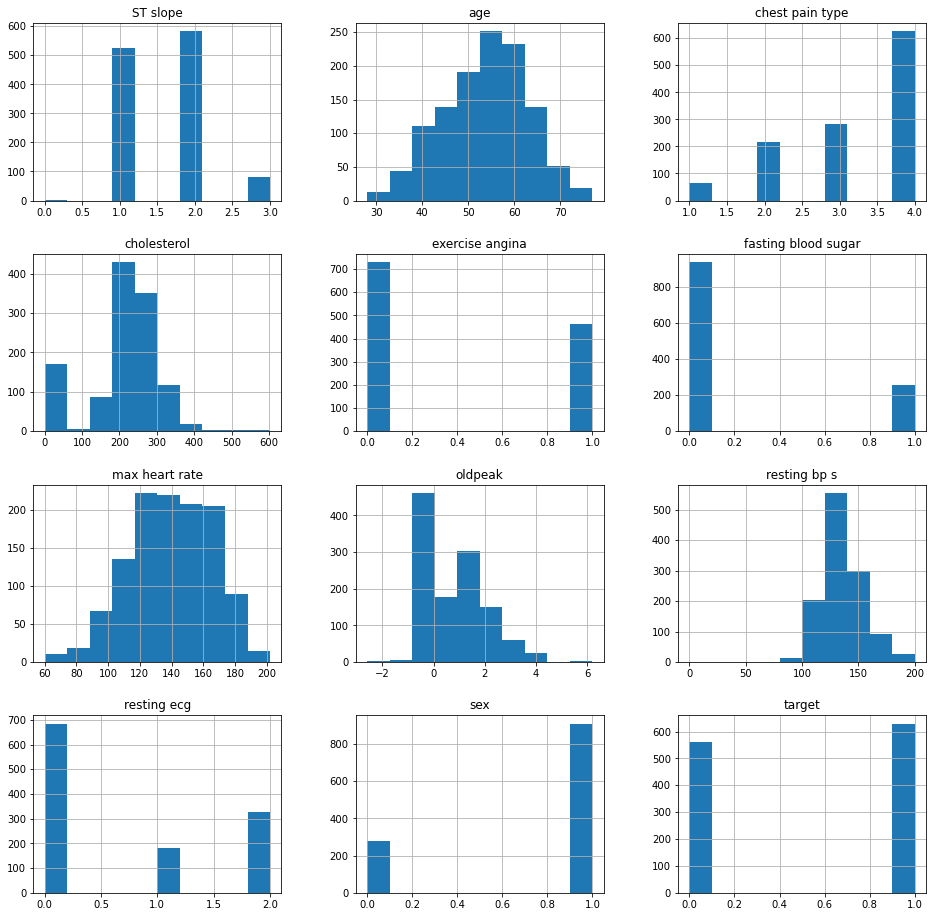

In [71]:
df.hist(figsize=(16,16))
plt.show()

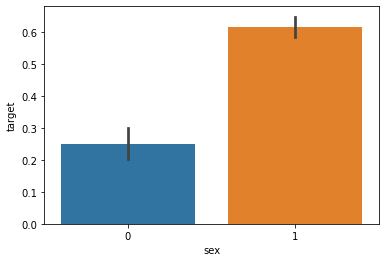

In [72]:
sns.barplot(df['sex'],df['target'])
plt.show()

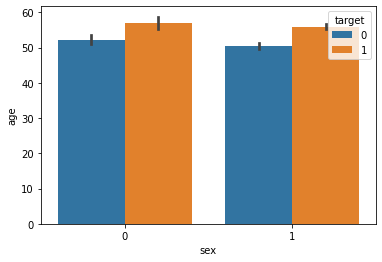

In [73]:
sns.barplot(df['sex'],df['age'],hue=df['target'])
plt.show()

In [74]:
# create a correlation heatmap

In [75]:
numeric_columns=['trestbps','chol','thalach','age','oldpeak']
sns.heatmap(df[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

KeyError: "['chol', 'thalach', 'trestbps'] not in index"

In [76]:
# create four distplots

AttributeError: 'DataFrame' object has no attribute 'thalach'

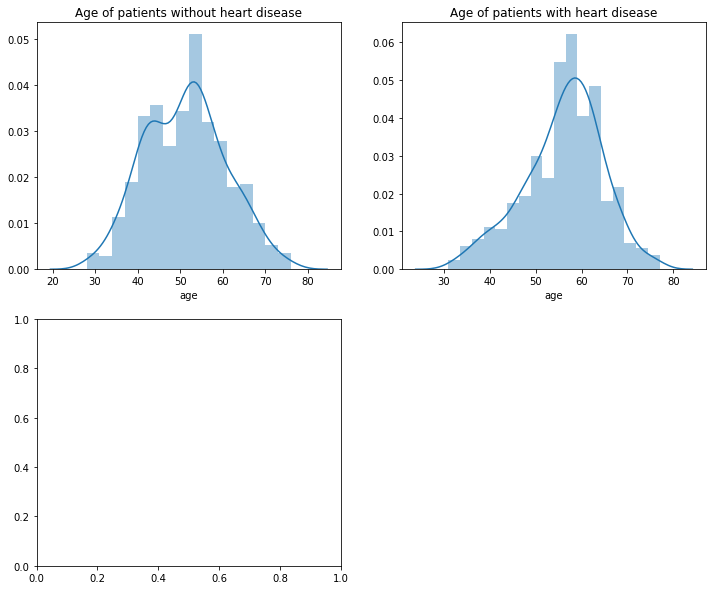

In [77]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(df[df['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(df[df['target']==0].thalach )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(df[df['target']==1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.show()

In [78]:
#DATA PREPROCESING

In [79]:
x,y=df.loc[:,:'thal'],df['target']

KeyError: 'thal'

In [80]:
x

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [81]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [82]:
x.shape

(303, 13)

In [83]:
x.size

3939

In [84]:
y.shape

(303,)

In [85]:
y.size

303

In [86]:
#TRAIN DATASET
#FEATURE SCALING

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [88]:
sc = StandardScaler()
x= sc.fit_transform(x)

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.3,shuffle=True)

In [90]:
x_train

array([[-0.15069166, -1.46841752, -0.93851463, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [-0.7021358 ,  0.68100522,  0.03203122, ..., -2.27457861,
        -0.71442887,  1.12302895],
       [ 0.18017482, -1.46841752, -0.93851463, ..., -2.27457861,
         1.24459328,  1.12302895],
       ...,
       [-0.48155814, -1.46841752,  1.00257707, ..., -0.64911323,
        -0.71442887, -0.51292188],
       [-2.24617937, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [ 1.28306308,  0.68100522, -0.93851463, ...,  0.97635214,
         0.26508221, -0.51292188]])

In [91]:
x_test

array([[ 0.18017482, -1.46841752, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.40075247,  0.68100522,  1.00257707, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 1.06248543,  0.68100522,  1.00257707, ..., -0.64911323,
        -0.71442887,  1.12302895],
       ...,
       [ 0.29046364,  0.68100522,  1.00257707, ..., -0.64911323,
         0.26508221,  1.12302895],
       [-0.26098049,  0.68100522,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [ 0.62133012,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895]])

In [92]:
y_train

49     1
171    0
223    0
58     1
154    1
      ..
156    1
123    1
15     1
125    1
265    0
Name: target, Length: 212, dtype: int64

In [93]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [94]:
x_train.shape

(212, 13)

In [95]:
y_train.shape

(212,)

In [96]:
#DECISION TREE

In [97]:
from sklearn.tree import DecisionTreeClassifier
df=DecisionTreeClassifier()
df.fit(x_train,y_train)

DecisionTreeClassifier()

In [98]:
prediction=df.predict(x_test)
accuracy_df=accuracy_score(y_test,prediction)*100

In [99]:
accuracy_df


76.92307692307693

In [100]:
#KNN

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
Knn=KNeighborsClassifier(n_neighbors=4)
Knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [103]:
prediction_Knn=Knn.predict(x_test)

In [104]:
accuracy_Knn=accuracy_score(y_test,prediction_Knn)*100

In [105]:
print('The Accuracy is : {}'.format(accuracy_Knn))

The Accuracy is : 85.71428571428571


In [106]:
#Decision Tree vs KNN

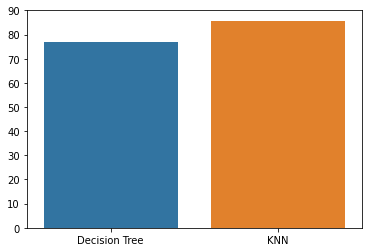

In [107]:
algorithms=['Decision Tree','KNN']
scores=[accuracy_df,accuracy_Knn]
sns.barplot(algorithms,scores)
plt.show()

In [52]:
#PREDICT HEART DESEASE WITH CUSTOM DATA

In [53]:
catagory=['YOU DO NOT HAVE HEART DISEASE','YOU HAVE HEART DESEASE']

In [54]:
#ENTER YOUR USER DATA HERE:
#age	sex	cp	trestbps	chol	fbs	restecg	thalach	exang	oldpeak	slope	ca	thal	

custom_data_Knn=np.array([[73,1,3,160,333,1,0,150,0,2.3,0,0,1]])


In [55]:
custom_data_prediction_Knn=Knn.predict(custom_data_Knn)
custom_data_prediction_Knn

array([1], dtype=int64)

In [56]:
int(custom_data_prediction_Knn)

1

In [57]:
print(catagory[int(custom_data_prediction_Knn)])

YOU HAVE HEART DESEASE
